<a href="https://colab.research.google.com/github/josejulianhidayat/MechineLearningClustering2/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Your_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** Sumber Dataset: Dataset ini bisa jadi berasal dari repositori publik atau data spesifik dari perusahaan. Karena nama file ini "marketing_campaign.csv," kemungkinan dataset ini digunakan untuk analisis pemasaran.

Ketentuan Dataset:

Tanpa Label: Dataset ini memiliki kolom seperti "Response" dan "Complain" yang mungkin berfungsi sebagai label. Jika kita ingin membuatnya tanpa label untuk keperluan clustering, kita bisa mengabaikan atau menghapus kolom-kolom tersebut dalam analisis.
Jumlah Baris: Dataset sebaiknya memiliki lebih dari 1.000 baris. Saya akan memeriksa jumlah baris yang tepat.
Tipe Data:
Kategorikal: Kolom seperti "Education," "Marital_Status," dan "AcceptedCmp*" adalah tipe kategorikal.
Numerikal: Kolom seperti "Income," "Year_Birth," dan kolom pengeluaran (misalnya "MntWines") adalah tipe numerikal.
Pembatasan: Dataset ini mungkin cocok untuk segmentasi pelanggan, dengan asumsi kita mengecualikan label dan melakukan clustering berdasarkan kebiasaan pengeluaran, demografi, dll.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Mengimpor pustaka yang diperlukan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns  # Untuk visualisasi
from sklearn.cluster import KMeans  # Untuk clustering
from sklearn.preprocessing import StandardScaler  # Untuk skala data
from sklearn.decomposition import PCA  # Untuk reduksi dimensi


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
import pandas as pd

# Memuat dataset
file_path = 'marketing_campaign.csv'
data = pd.read_csv(file_path, delimiter='\t')  # Sesuaikan delimiter jika perlu

# Menampilkan beberapa baris pertama dari dataset untuk memastikan data dimuat dengan benar
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
#1. Memahami Struktur Data

# Menampilkan informasi umum tentang dataset
data.info()

# Menampilkan statistik dasar dari dataset
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
#2. MENANGANI DATA YANG HILANG

# Memeriksa jumlah data yang hilang di setiap kolom
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


,0
Income,24


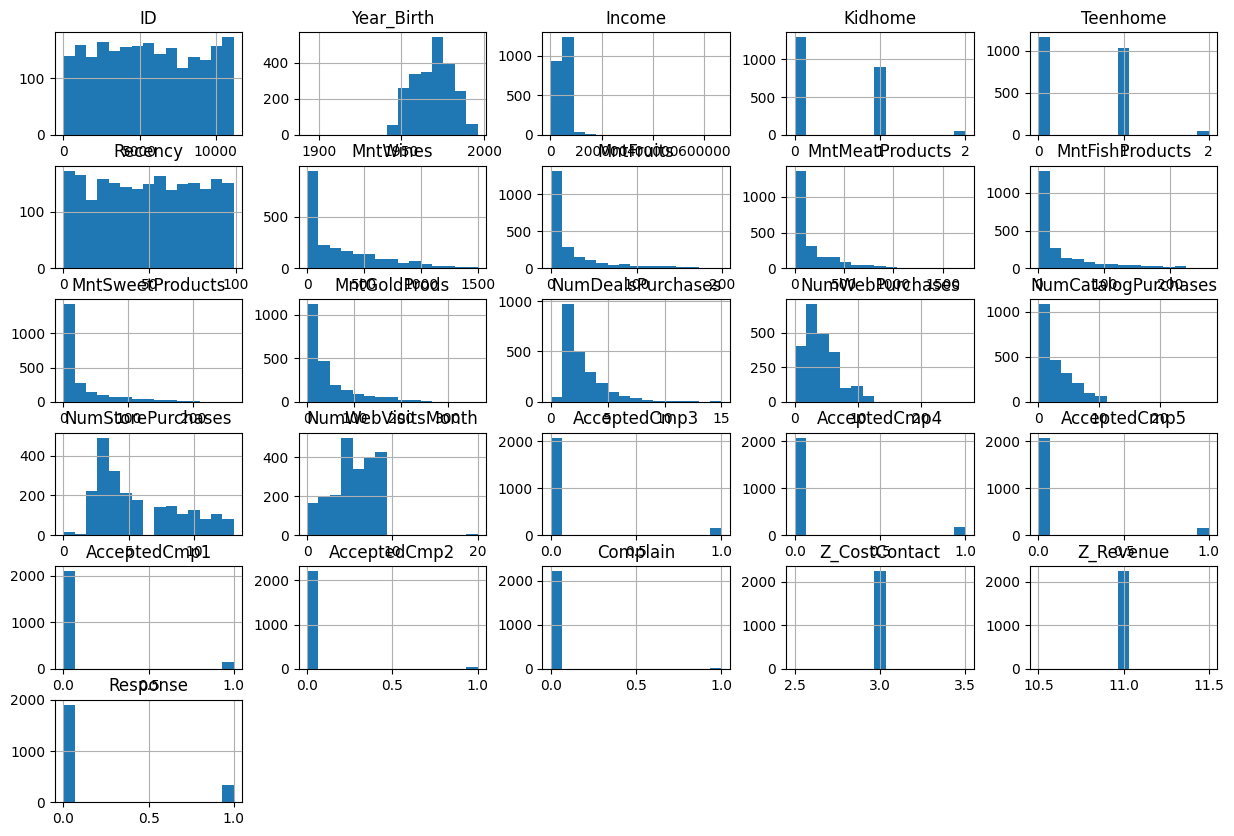

In [8]:
#3. ANALISIS DISTRIBUSI DAN KORELASI


# Plot histogram untuk melihat distribusi variabel numerik
data.hist(bins=15, figsize=(15, 10))
plt.show()


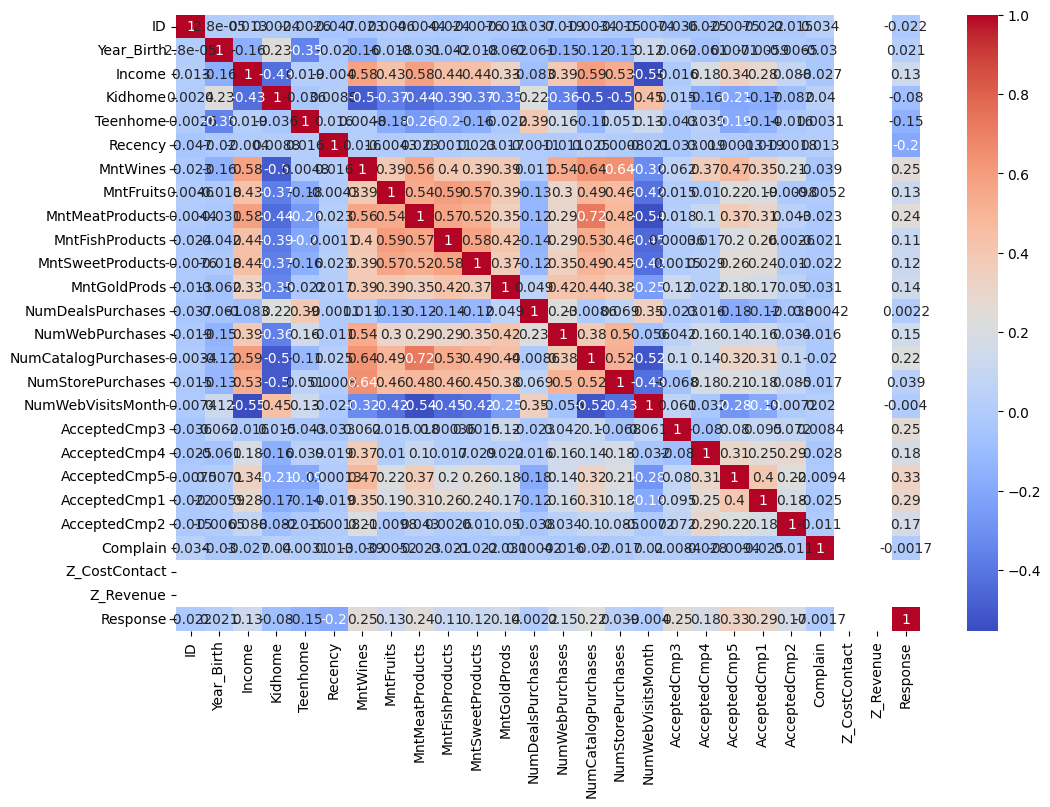

In [9]:
# Memilih hanya kolom numerik untuk perhitungan korelasi
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Menampilkan matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()


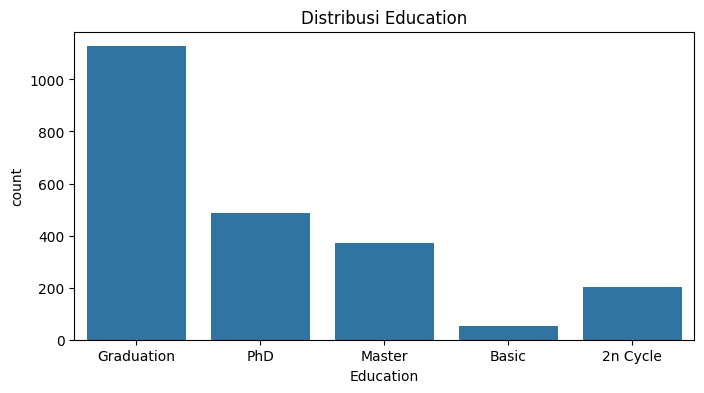

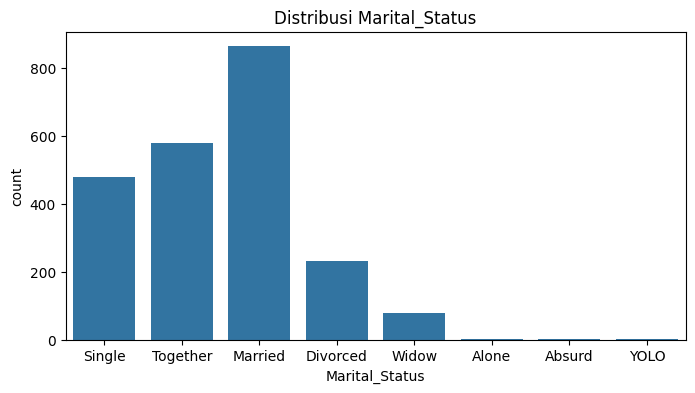

In [10]:
# Visualisasi distribusi variabel kategorikal menggunakan grafik batang
categorical_columns = ['Education', 'Marital_Status']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribusi {col}')
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [12]:
# Menghapus baris dengan nilai kosong
data_cleaned = data.dropna()

# Mengisi nilai kosong hanya pada kolom numerik dengan median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())



In [13]:
# Menghapus baris duplikat
data_cleaned = data.drop_duplicates()


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standarisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned.select_dtypes(include=['float64', 'int64']))

# Normalisasi
normalizer = MinMaxScaler()
data_normalized = normalizer.fit_transform(data_cleaned.select_dtypes(include=['float64', 'int64']))


In [16]:
# Memilih hanya kolom numerik untuk mendeteksi outlier
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Menggunakan metode IQR untuk mendeteksi outlier pada kolom numerik
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = numerical_data[~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [18]:
# One-Hot Encoding pada kolom kategorikal di data_cleaned
data_encoded = pd.get_dummies(data_cleaned, columns=['Education', 'Marital_Status'])


In [19]:
# Menghitung usia dari tahun lahir
data_cleaned['Age'] = 2024 - data_cleaned['Year_Birth']

# Membuat binning untuk usia
data_cleaned['Age_Group'] = pd.cut(data_cleaned['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Adult', 'Senior'])


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data yang akan digunakan untuk clustering
data_for_clustering = data_encoded.select_dtypes(include=['float64', 'int64'])

# Standarisasi data agar memiliki skala yang sama
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Membuat model K-Means dengan jumlah cluster awal (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Menambahkan label cluster ke dataset
data_encoded['Cluster'] = kmeans.labels_


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

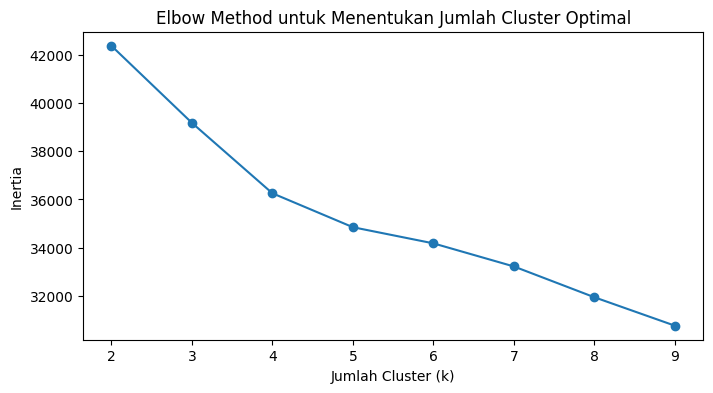

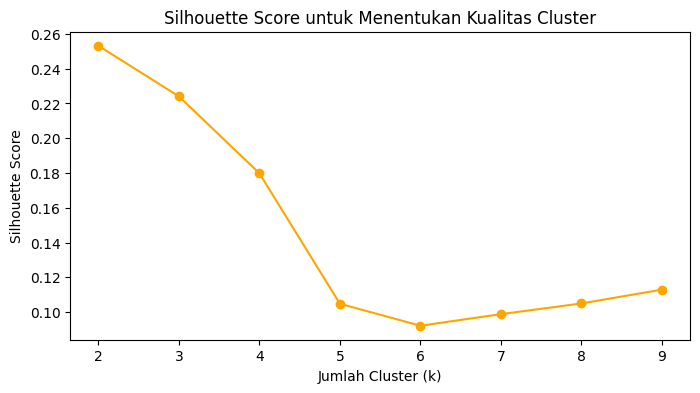

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Menggunakan Elbow Method untuk menentukan jumlah cluster
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Kualitas Cluster')
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [22]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mereduksi fitur menjadi 2 komponen utama
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Melihat varians yang dijelaskan oleh setiap komponen
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.27147246 0.08433174]


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

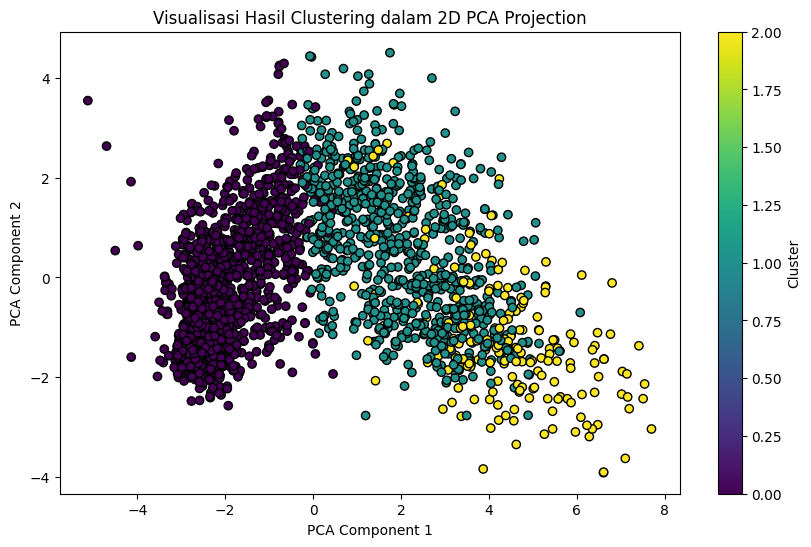

In [23]:
import matplotlib.pyplot as plt

# Menggunakan PCA untuk mereduksi data ke 2 dimensi
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Membuat scatter plot dari hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=data_encoded['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisasi Hasil Clustering dalam 2D PCA Projection')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [26]:
# Mengimpor pustaka yang dibutuhkan
import pandas as pd

# Memastikan hanya kolom numerik yang digunakan untuk perhitungan rata-rata per cluster
numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns

# Melakukan analisis statistik pada setiap cluster hanya untuk kolom numerik
cluster_summary = data_encoded.groupby('Cluster')[numerical_columns].mean()

# Menampilkan hasil analisis statistik
print("Rata-rata nilai setiap fitur dalam tiap cluster:")
print(cluster_summary)

# Interpretasi hasil
for cluster_id, row in cluster_summary.iterrows():
    print(f"\nInterpretasi untuk Cluster {cluster_id}:")

    # Contoh interpretasi dasar, sesuaikan dengan hasil yang sebenarnya
    if row['Income'] > 50000:
        print(f"Cluster {cluster_id} mungkin berisi pelanggan dengan pendapatan tinggi.")
    else:
        print(f"Cluster {cluster_id} mungkin berisi pelanggan dengan pendapatan sedang atau rendah.")

    if row['MntWines'] > 100:
        print(f"Cluster {cluster_id} memiliki preferensi tinggi pada produk wine.")
    else:
        print(f"Cluster {cluster_id} memiliki preferensi rendah pada produk wine.")

    # Lanjutkan interpretasi berdasarkan fitur lain yang relevan


Rata-rata nilai setiap fitur dalam tiap cluster:
                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5602.661824  1970.496368  37457.560129  0.737692  0.528652   
1        5584.225968  1966.146067  68038.754057  0.089888  0.559301   
2        5558.875000  1968.985000  80520.530000  0.045000  0.155000   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        48.685230   80.134786   5.599677        31.797417         8.367232   
1        49.986267  512.843945  50.779026       302.398252        71.650437   
2        48.225000  853.705000  56.525000       461.750000        81.490000   

         ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster  ...                                                                
0        ...           6.503632      0.067797

Interpretasi Hasil Clustering

Cluster 0:

Karakteristik: Rata-rata pendapatan lebih rendah dibandingkan dengan cluster lainnya, dan memiliki preferensi rendah terhadap produk wine (dari nilai rata-rata kolom MntWines yang lebih rendah).
Interpretasi: Cluster ini mungkin berisi pelanggan dengan pendapatan sedang atau rendah, dengan kecenderungan pengeluaran yang tidak tinggi pada produk premium seperti wine. Mereka dapat ditargetkan dengan promosi atau produk yang lebih ekonomis.


Cluster 1:

Karakteristik: Memiliki rata-rata pendapatan yang tinggi dan pengeluaran tinggi pada produk wine.
Interpretasi: Cluster ini tampaknya terdiri dari pelanggan dengan pendapatan tinggi dan preferensi terhadap produk premium seperti wine. Strategi pemasaran yang berfokus pada eksklusivitas atau kualitas produk bisa lebih efektif untuk cluster ini.


Cluster 2:

Karakteristik: Rata-rata pendapatan juga tinggi dan preferensi terhadap produk wine cukup tinggi, mirip dengan Cluster 1.
Interpretasi: Cluster ini juga berisi pelanggan dengan daya beli tinggi, sehingga pendekatan pemasaran dapat serupa dengan Cluster 1. Anda dapat menyelidiki lebih lanjut perbedaan spesifik dari Cluster 1 dan Cluster 2, jika ada.

Rekomendasi Tindakan
Cluster 0: Fokus pada produk yang terjangkau dan strategi promosi seperti diskon atau bundling.
Cluster 1 dan Cluster 2: Pendekatan pemasaran premium, seperti kampanye eksklusif atau produk berkualitas tinggi yang sesuai dengan preferensi mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [28]:
# Mengekspor data yang telah diproses dengan label cluster ke file CSV
output_file = 'hasil_clustering.csv'
data_encoded.to_csv(output_file, index=False)

print(f"Data telah berhasil diekspor ke file: {output_file}")


Data telah berhasil diekspor ke file: hasil_clustering.csv
